In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import geopandas
from functools import reduce
from sklearn.linear_model import LinearRegression
from IPython.core.display import HTML, display
from matplotlib.animation import FuncAnimation

In [2]:
world_path = geopandas.datasets.get_path('naturalearth_lowres')
world_df = geopandas.read_file(world_path)

In [3]:
pages = {
    '2010': 'https://en.wikipedia.org/wiki/The_World%27s_Billionaires_2010',
    '2011': 'https://en.wikipedia.org/wiki/The_World%27s_Billionaires_2011',
    '2012': 'https://en.wikipedia.org/wiki/The_World%27s_Billionaires_2012',
    '2013': 'https://en.wikipedia.org/wiki/The_World%27s_Billionaires_2013',
    '2014': 'https://en.wikipedia.org/wiki/The_World%27s_Billionaires_2014',
    '2015': 'https://en.wikipedia.org/wiki/The_World%27s_Billionaires_2015'
}

In [4]:
#Webscraping for data: commented out so files were not redownloaded every time
# for page in pages:
#     url = pages[page]
#     data = pd.read_html(url)[2]
#     header=data.iloc[0]
#     data=data[1:]
#     data.columns=header
#     file_name = page + ".csv"
#     if os.path.exists(file_name):
#         continue
        
#     data.to_csv(file_name ,index=False)

In [5]:
def get_data(year):
    data=pd.read_csv(year+'.csv')
    data.loc[data['Net Worth USD billion'] > 80, 'Net Worth USD billion'] = data['Net Worth USD billion'].div(10)
    return data

In [6]:
pd.options.display.max_rows = 999
data10 = get_data('2010')
data11 = get_data('2011')
data12 = get_data('2012')
data13 = get_data('2013')
data14 = get_data('2014')
data15 = get_data('2015')

In [7]:
industries = ['Technology', 'Fashion & Retail', 'Finance', 
              'Telecom', 'Media & Entertainment', 'Energy',
              'Real Estate', 'Gambling & Casinos', 'Food & Beverage',
             'Automotive', 'Manufacturing', 'Mining',
             'Healthcare', 'Logistics', 'Diversified']

In [8]:
GDP_source = 'https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2010&name_desc=false&start=1960'

world_gdp = {
    '2010': 66051234056873.6,
    '2011': 73393195809480.6,
    '2012': 75085219051414.4,
    '2013': 77237062496074.3,
    '2014': 79333432907873.6,
    '2015': 75050176318824.8
}

In [9]:
for i in world_gdp:
    world_gdp[i] = world_gdp[i]/1000000000
world_gdp

{'2010': 66051.2340568736,
 '2011': 73393.19580948059,
 '2012': 75085.2190514144,
 '2013': 77237.0624960743,
 '2014': 79333.43290787359,
 '2015': 75050.1763188248}

In [10]:
data = [data10, data11, data12, data13, data14, data15]

In [11]:
topTens = []
for i in data:
    topTens.append(i[:10][['Name','Net Worth USD billion']])

In [12]:
totals = []
years = []
year = 2010
while year < 2016:
    for i in topTens:
        total=i['Net Worth USD billion'].sum()
        totals.append(total)
        years.append(str(year))
        year += 1

In [13]:
totals = pd.DataFrame(
    {'years': years,
     'totals (billions)': totals
    })
totals

,years,totals (billions)
0,2010,342.2
1,2011,406.1
2,2012,395.4
3,2013,451.5
4,2014,507.6
5,2015,556.0


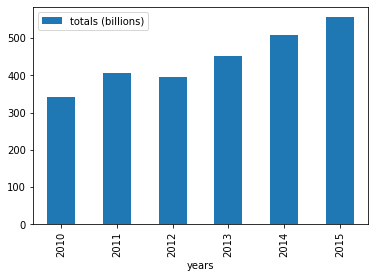

In [14]:
ax = totals.plot.bar(x='years',y='totals (billions)')

In [15]:
top_2015 = list(topTens[-1]['Name'])

In [16]:
top_2015

['Bill Gates',
 'Carlos Slim Helu',
 'Warren Buffett',
 'Amancio Ortega',
 'Larry Ellison',
 'Charles Koch',
 'David Koch',
 'Christy Walton',
 'Jim Walton',
 'Liliane Bettencourt']

In [17]:
richest_totals = {}
for i in top_2015:
    amount = []
    for j in data:
        amount.append(float(j[j['Name']==i]['Net Worth USD billion'].values))
    richest_totals[i]=amount
richest_totals

{'Bill Gates': [53.0, 56.0, 61.0, 67.0, 76.0, 79.2],
 'Carlos Slim Helu': [53.5, 74.0, 69.0, 73.0, 72.0, 77.1],
 'Warren Buffett': [47.0, 50.0, 44.0, 53.5, 58.2, 72.7],
 'Amancio Ortega': [25.0, 31.0, 37.5, 57.0, 64.0, 64.5],
 'Larry Ellison': [28.0, 39.5, 36.0, 43.0, 48.0, 54.3],
 'Charles Koch': [17.5, 22.0, 25.0, 34.0, 40.0, 42.9],
 'David Koch': [17.5, 22.0, 25.0, 34.0, 40.0, 42.9],
 'Christy Walton': [22.5, 26.5, 25.3, 28.2, 36.7, 41.7],
 'Jim Walton': [20.7, 21.3, 23.7, 26.7, 34.7, 40.6],
 'Liliane Bettencourt': [20.0, 23.5, 24.0, 30.0, 34.5, 40.1]}

In [18]:
df = pd.DataFrame(richest_totals, index=['2010','2011','2012','2013','2014','2015'])
fig1 = df.T
for i in range(len(fig1)):
    fig1.iloc[i][1:]=fig1.iloc[i][1:] - fig1.iloc[i][0]
fig1

,2010,2011,2012,2013,2014,2015
Bill Gates,53.0,3.0,8.0,14.0,23.0,26.2
Carlos Slim Helu,53.5,20.5,15.5,19.5,18.5,23.6
Warren Buffett,47.0,3.0,-3.0,6.5,11.2,25.7
Amancio Ortega,25.0,6.0,12.5,32.0,39.0,39.5
Larry Ellison,28.0,11.5,8.0,15.0,20.0,26.3
Charles Koch,17.5,4.5,7.5,16.5,22.5,25.4
David Koch,17.5,4.5,7.5,16.5,22.5,25.4
Christy Walton,22.5,4.0,2.8,5.7,14.2,19.2
Jim Walton,20.7,0.6,3.0,6.0,14.0,19.9
Liliane Bettencourt,20.0,3.5,4.0,10.0,14.5,20.1


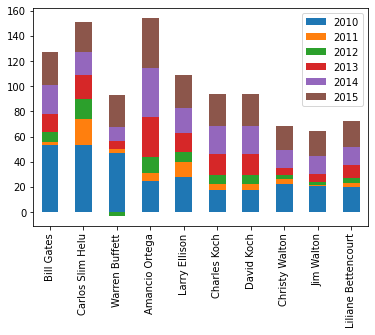

In [19]:
ax = fig1.plot.bar(stacked=True)


In [20]:
def combine_data(df):
    df = df[['Net Worth USD billion','Industry']]
    df = df.groupby('Industry').sum()
    d = None
    if d == None:
        d = df
    else:
        d.merge(df, left_index=True, right_index=True)
    return d

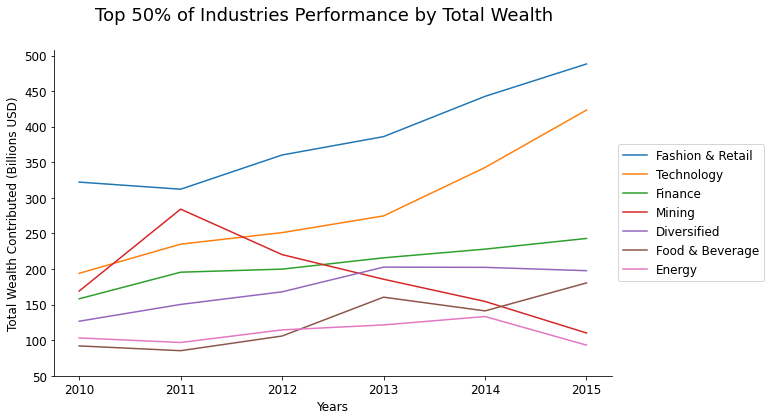

In [21]:
#Multiple line graph: Growth of Each Industry showing the top half of industries
ind_sums = []
year = 2010
while year < 2016:
    for i in data:
        x = i[['Net Worth USD billion','Industry']]
        x = x.groupby('Industry').sum()
        x.columns = [str(year)]
        ind_sums.append(x)
        year += 1
v=ind_sums[0].merge(ind_sums[1], left_index=True, right_index=True, how='inner')
v=v.merge(ind_sums[2], left_index=True, right_index=True, how='inner')
v=v.merge(ind_sums[3], left_index=True, right_index=True, how='inner')
v=v.merge(ind_sums[4], left_index=True, right_index=True, how='inner')
v=v.merge(ind_sums[5], left_index=True, right_index=True, how='inner')
# v.plot.line()
r=v.T

top7 = list(v.mean(axis=1).sort_values(ascending=False)[:7].index)

plt.rcParams["font.size"] = 12
r = r[top7]
fig, ax = plt.subplots()
r.plot.line(figsize=(10,6), ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks(np.arange(50, 550, step=50))
ax.set_ylabel('Total Wealth Contributed (Billions USD)')
ax.set_xlabel('Years')
fig.suptitle('Top 50% of Industries Performance by Total Wealth', fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [22]:
r

Industry,Fashion & Retail,Technology,Finance,Mining,Diversified,Food & Beverage,Energy
2010,322.2,194.0,158.2,169.1,126.7,92.0,103.2
2011,312.2,235.0,195.6,284.2,150.3,85.3,96.8
2012,360.3,251.2,199.9,220.3,168.0,105.9,114.5
2013,386.1,274.7,215.8,185.7,202.7,160.5,121.5
2014,442.7,342.7,228.0,154.5,202.4,141.2,133.3
2015,488.2,423.4,243.0,110.2,197.7,180.5,93.1


In [23]:
v

,2010,2011,2012,2013,2014,2015
Industry,,,,,,
Automotive,11.1,35.1,44.6,47.8,57.9,70.8
Diversified,126.7,150.3,168.0,202.7,202.4,197.7
Energy,103.2,96.8,114.5,121.5,133.3,93.1
Fashion & Retail,322.2,312.2,360.3,386.1,442.7,488.2
Finance,158.2,195.6,199.9,215.8,228.0,243.0
Food & Beverage,92.0,85.3,105.9,160.5,141.2,180.5
Gambling & Casinos,9.3,23.3,24.9,37.2,60.0,44.9
Healthcare,10.0,10.0,10.6,11.0,24.8,32.2
Manufacturing,16.7,43.5,30.4,16.1,39.3,41.6


In [24]:
v.mean(axis=1).sort_values(ascending=False)

Industry
Fashion & Retail         385.283333
Technology               286.833333
Finance                  206.750000
Mining                   187.333333
Diversified              174.633333
Food & Beverage          127.566667
Energy                   110.400000
Real Estate               90.716667
Telecom                   88.733333
Media & Entertainment     79.283333
Automotive                44.550000
Gambling & Casinos        33.266667
Manufacturing             31.266667
Healthcare                16.433333
dtype: float64

In [25]:
pct_change_yby = v.pct_change(axis='columns', periods=1).iloc[:,1:]
pct_change_5y = v.pct_change(axis='columns', periods=5).iloc[:,-1]
pct_change_yby = pct_change_yby.rename(columns={'2011':'2010-2011','2012':'2011-2012',
                               '2013':'2012-2013','2014':'2013-2014','2015':'2014-2015'})
pct_change_yby = pct_change_yby*100
pct_change_5y

Industry
Automotive               5.378378
Diversified              0.560379
Energy                  -0.097868
Fashion & Retail         0.515208
Finance                  0.536030
Food & Beverage          0.961957
Gambling & Casinos       3.827957
Healthcare               2.220000
Manufacturing            1.491018
Media & Entertainment    1.725532
Mining                  -0.348315
Real Estate              0.527115
Technology               1.182474
Telecom                  0.403141
Name: 2015, dtype: float64

In [26]:
pct_change_4y = v.iloc[:,1:].pct_change(axis='columns', periods=4).iloc[:,-1]
pct_change_4y = pd.DataFrame(pct_change_4y)
pct_change_4y.columns=['Percent Change']
pct_change_4y = pct_change_4y.sort_values(by='Percent Change', ascending=False)
positive_trend_4 = pct_change_4y[:11]*100
negative_trend_4 = pct_change_4y[11:]*100
neg_ind_4 = list(negative_trend_4.index)
pos_ind_4 = list(positive_trend_4.index)

In [27]:
negative_4 = v.loc[neg_ind_4].T[1:]
positive_4 = v.loc[pos_ind_4].T[1:]

In [28]:
pct_change_5y = pd.DataFrame(pct_change_5y)
pct_change_5y.columns=['Percent Change']
pct_change_5y = pct_change_5y.sort_values(by='Percent Change', ascending=False)
positive_trend = pct_change_5y[:7]*100
negative_trend = pct_change_5y[7:]*100
neg_ind = list(negative_trend.index)
pos_ind = list(positive_trend.index)

In [29]:
negative = v.loc[neg_ind].T
positive = v.loc[pos_ind].T

In [30]:
pos_trends = ['Technology','Fashion & Retail', 'Diversified', 'Media & Entertainment', 
              'Real Estate', 'Food & Beverage', 'Finance']
positive = pct_change_yby.loc[pos_trends].T

In [31]:
positive

Industry,Technology,Fashion & Retail,Diversified,Media & Entertainment,Real Estate,Food & Beverage,Finance
2010-2011,21.134021,-3.103662,18.626677,15.957447,-9.544469,-7.282609,23.640961
2011-2012,6.893617,15.406791,11.776447,-4.587156,-28.057554,24.150059,2.198364
2012-2013,9.355096,7.160699,20.654762,55.961538,16.833333,51.558074,7.953977
2013-2014,24.754277,14.659415,-0.148002,39.334155,39.514979,-12.024922,5.653383
2014-2015,23.548293,10.277841,-2.322134,13.362832,43.967280,27.832861,6.578947


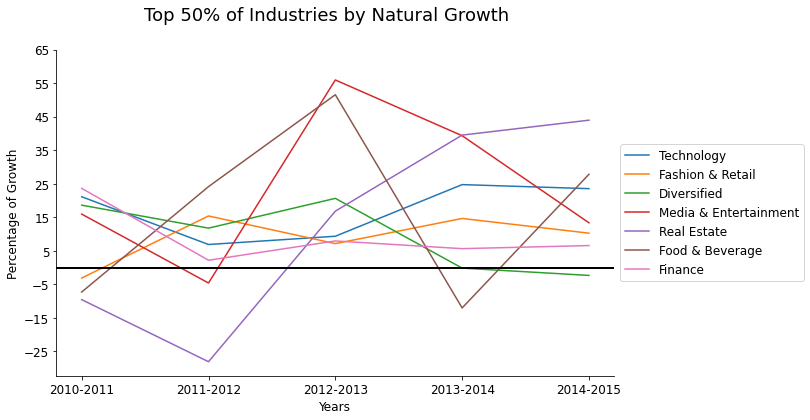

In [32]:
#Multi Line Graph: Industries with the most positive average percent change 
#TODO Change to be total wealth with highest percent change.
fig, ax = plt.subplots()
positive.plot.line(figsize=(10,6), ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yticks(np.arange(-25, 75, step=10))
ax.set_ylabel('Percentage of Growth')
ax.set_xlabel('Years')
fig.suptitle('Top 50% of Industries by Natural Growth', fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(range(len(positive.index)))
ax.set_xticklabels(positive.index)
ax.axhline(linewidth=2, color='black')
pos_trends = ['Technology','Fashion & Retail', 'Diversified', 'Media & Entertainment', 
              'Real Estate', 'Food & Beverage', 'Finance']

In [33]:
def plot_pair(title):
    t = plt.subplots(ncols=2, figsize=(15,6))
    plt.subplots_adjust(wspace=0.5)
#     t[0].suptitle(title, fontsize=18)
    return list(t[1])

[None, None, None, None, None, None, None, None, None, None]

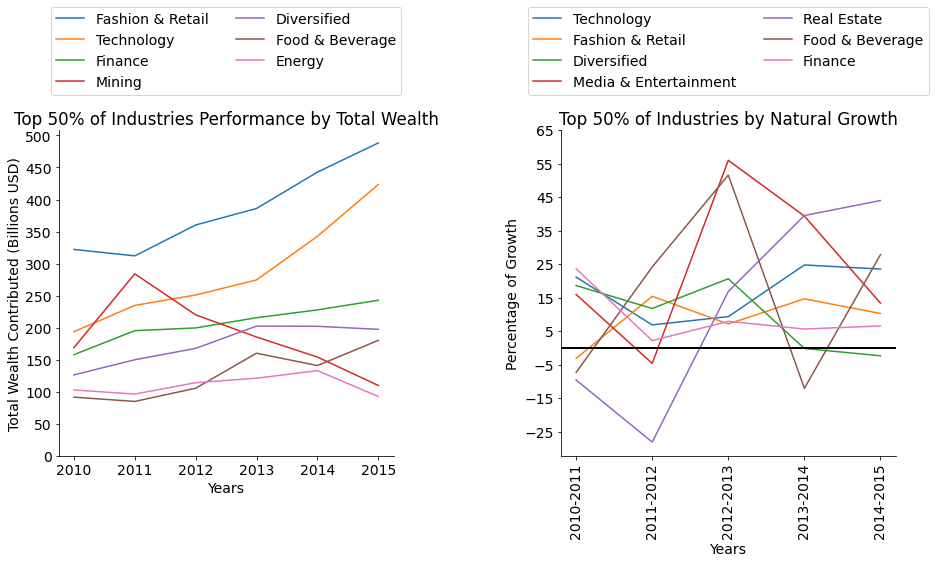

In [34]:
plt.rcParams["font.size"] = 14
t = plt.subplots(ncols=2, figsize=(15,6))
ax_list = list(t[1])
plt.subplots_adjust(wspace=0.5)
r = r[top7]
r.plot.line(ax=ax_list[0],title='Top 50% of Industries Performance by Total Wealth')
ax_list[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=2)
ax_list[0].set_yticks(np.arange(0, 550, step=50))
ax_list[0].set_ylabel('Total Wealth Contributed (Billions USD)')
ax_list[0].set_xlabel('Years')
# fig.suptitle('Top 50% of Industries Performance by Total Wealth', fontsize=18)
ax_list[0].spines['top'].set_visible(False)
ax_list[0].spines['right'].set_visible(False)

positive.plot.line(ax=ax_list[1],title='Top 50% of Industries by Natural Growth')
ax_list[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=2)
ax_list[1].set_yticks(np.arange(-25, 75, step=10))
ax_list[1].set_ylabel('Percentage of Growth')
ax_list[1].set_xlabel('Years')
# fig.suptitle('Top 50% of Industries by Natural Growth', fontsize=18)
ax_list[1].spines['top'].set_visible(False)
ax_list[1].spines['right'].set_visible(False)
ax_list[1].set_xticks(range(len(positive.index)))
ax_list[1].set_xticklabels(positive.index)
ax_list[1].axhline(linewidth=2, color='black')
plt.setp(ax_list[1].xaxis.get_majorticklabels(), rotation=90)
# t[0].savefig("industry_growth.svg", bbox_inches="tight")

Text(0.5, 0.98, 'Negatively Trending Industries (Excluding 2010-2011)')

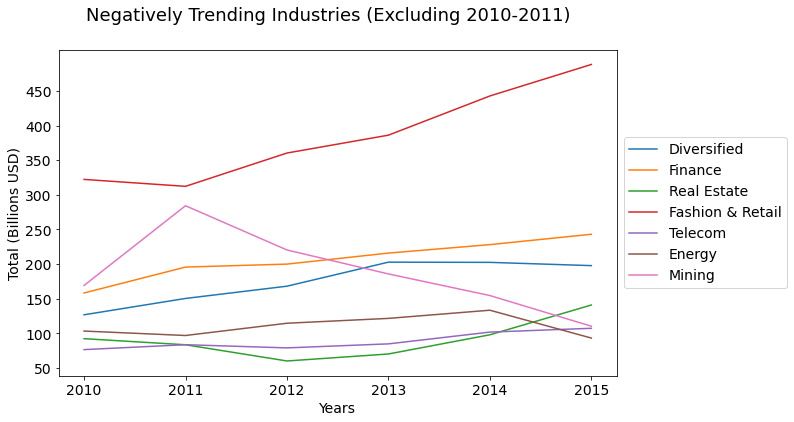

In [35]:
fig, ax = plt.subplots()
negative.plot.line(figsize=(10,6), ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks(np.arange(50, 500, step=50))
ax.set_ylabel('Total (Billions USD)')
ax.set_xlabel('Years')
fig.suptitle('Negatively Trending Industries (Excluding 2010-2011)', fontsize=18)

Text(0.5, 0.98, 'Positively Trending Industries')

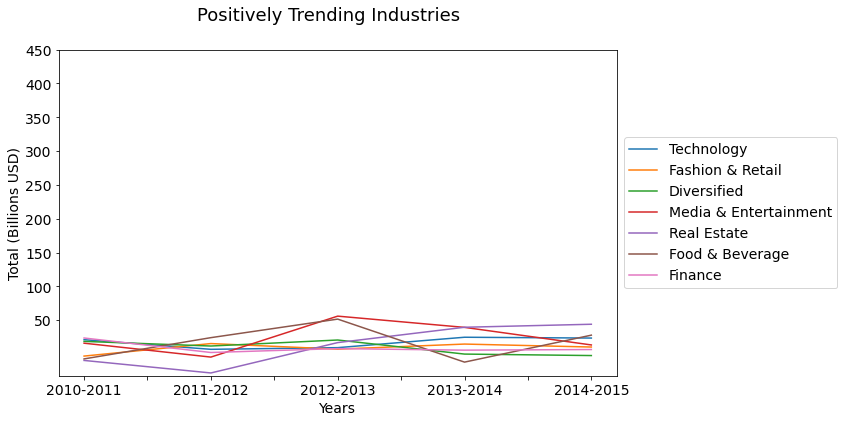

In [36]:
fig, ax = plt.subplots()
positive.plot.line(figsize=(10,6), ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks(np.arange(50, 500, step=50))
ax.set_ylabel('Total (Billions USD)')
ax.set_xlabel('Years')
fig.suptitle('Positively Trending Industries', fontsize=18)

Text(0.5, 0.98, 'Negatively Trending Industries')

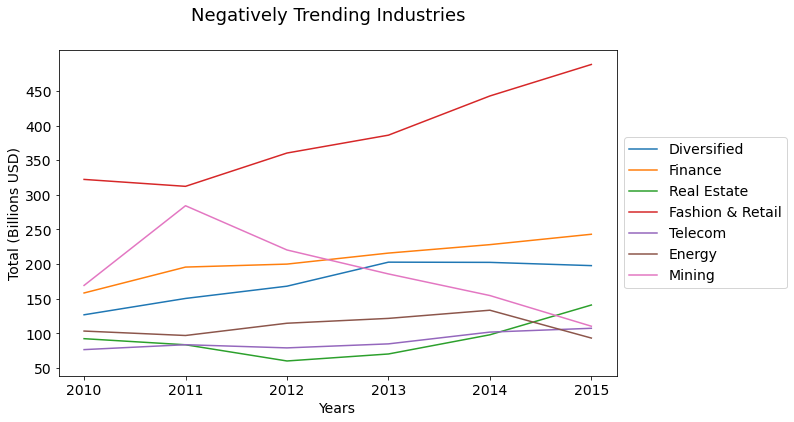

In [37]:
fig, ax = plt.subplots()
negative.plot.line(figsize=(10,6), ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks(np.arange(50, 500, step=50))
ax.set_ylabel('Total (Billions USD)')
ax.set_xlabel('Years')
fig.suptitle('Negatively Trending Industries', fontsize=18)

In [38]:
# top7_chg = list(pct_change_yby.mean(axis=1).sort_values(ascending=False)[:8].index)
# bot7_chg = list(pct_change_yby.mean(axis=1).sort_values(ascending=False)[8:].index)
top7_chg = list(pct_change_yby.mean(axis=1).sort_values(ascending=False)[:9].index)
bot7_chg = list(pct_change_yby.mean(axis=1).sort_values(ascending=False)[9:].index)
pct_change_yby.mean(axis=1).sort_values(ascending=False)

Industry
Automotive               58.773226
Gambling & Casinos       48.585167
Manufacturing            46.655284
Healthcare               33.013368
Media & Entertainment    24.005763
Technology               17.137061
Food & Beverage          16.846693
Real Estate              12.542714
Diversified               9.717550
Finance                   9.205126
Fashion & Retail          8.880217
Telecom                   7.322838
Energy                   -0.449699
Mining                   -3.119644
dtype: float64

In [39]:
r=v.T

Text(0.5, 0.98, 'Positively Trending Industries')

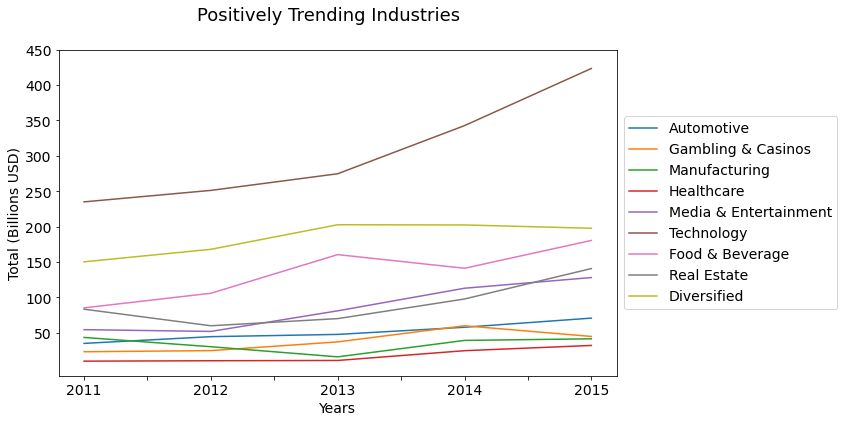

In [40]:
w=r[top7_chg][1:]
fig, ax = plt.subplots()
w.plot.line(figsize=(10,6), ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks(np.arange(50, 500, step=50))
ax.set_ylabel('Total (Billions USD)')
ax.set_xlabel('Years')
fig.suptitle('Positively Trending Industries', fontsize=18)

Text(0.5, 0.98, 'Negatively Trending Industries')

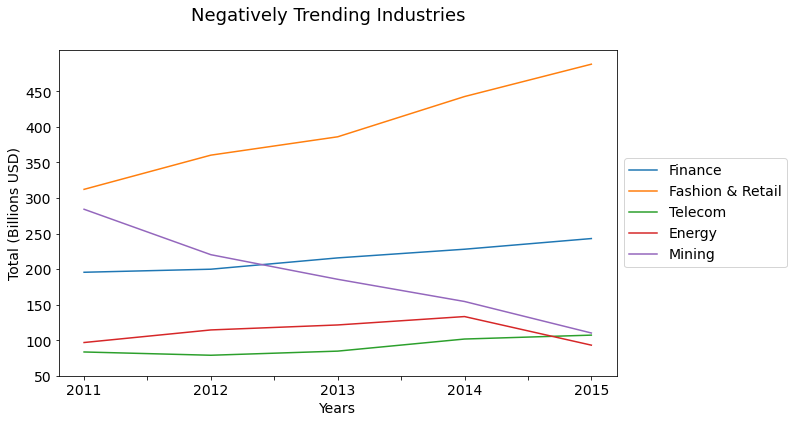

In [41]:
w=r[bot7_chg][1:]
fig, ax = plt.subplots()
w.plot.line(figsize=(10,6), ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks(np.arange(50, 500, step=50))
ax.set_ylabel('Total (Billions USD)')
ax.set_xlabel('Years')
fig.suptitle('Negatively Trending Industries', fontsize=18)

In [42]:
z = data10[['Name','Industry','Net Worth USD billion']]
z = z.rename(columns={'Net Worth USD billion': '2010'})
z[84:]['2010'].div(10)

84     0.80
85     0.79
86     0.78
87     0.77
88     0.76
89     0.76
90     0.76
91     0.76
92     0.75
93     0.75
94     0.75
95     0.75
96     0.75
97     0.75
98     0.73
99     0.72
100    0.72
101    0.72
Name: 2010, dtype: float64

In [43]:
q= data11[['Name','Industry','Net Worth USD billion']]
q = q.rename(columns={'Net Worth USD billion': '2011'})

In [44]:
new_df = pd.merge(z, q, on=['Name','Industry'],how ='outer')
new_df[new_df['Industry']=='Automotive']

,Name,Industry,2010,2011
50,Susanne Klatten,Automotive,11.1,14.6
109,Stefan Quandt,Automotive,NaN,10.7
115,Johanna Quandt,Automotive,NaN,9.8


In [45]:
data15[data15['Industry']=='Automotive']

,No.,Name,Nationality,Age,Gender,Net Worth USD billion,Source(s) of wealth,Industry
53,54,Susanne Klatten,Germany,52.0,F,16.8,"BMW, pharmaceuticals",Automotive
58,59,Stefan Quandt,Germany,48.0,M,15.6,BMW,Automotive
78,77,Johanna Quandt,Germany,88.0,F,13.9,BMW,Automotive
92,92,Jack Taylor,United States of America,92.0,M,12.5,Enterprise Rent-A-Car,Automotive
100,100,Elon Musk,United States of America,43.0,M,12.0,Tesla Motors,Automotive


In [46]:
y_tots = []
for i in data:
    y_tots.append(i['Net Worth USD billion'].sum())

In [47]:
totals = {"Years": years,"Total":y_tots}
totals = pd.DataFrame(totals)
totals

,Years,Total
0,2010,1457.8
1,2011,1723.7
2,2012,1742.6
3,2013,1906.5
4,2014,2152.9
5,2015,2301.7


Text(0.5, 0.98, 'Growth of Total Wealth Over Time')

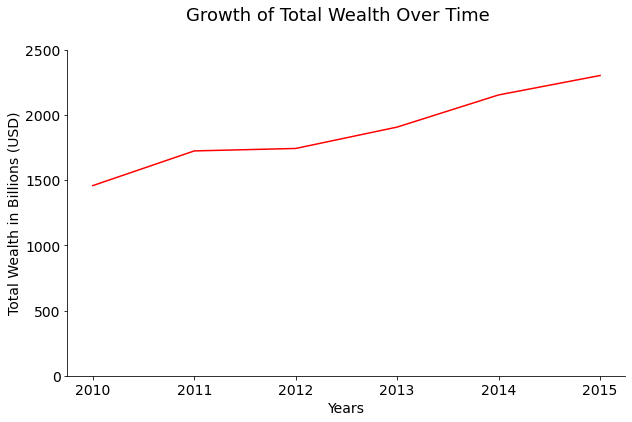

In [48]:
fig, ax = plt.subplots()
plt.rcParams["font.size"] = 14
totals.plot.line(x='Years', y='Total', legend = False,ax=ax, figsize=(10,6), c='red')
plt.yticks(np.arange(0, 3000, step=500))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Total Wealth in Billions (USD)')
fig.suptitle('Growth of Total Wealth Over Time', fontsize=18)
# ax.get_figure().savefig("Total_Growth.svg", bbox_inches="tight")

In [49]:
# df.loc = df.map(world_gdp)
totals['GDP'] = totals['Years'].map(world_gdp)

In [50]:
nat_nums = data15['Nationality'].value_counts()

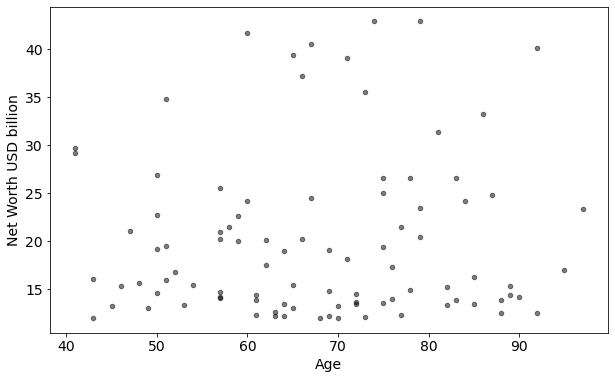

In [51]:
age_total = data15[['Age','Net Worth USD billion','Gender']][5:]
age_total = age_total[age_total['Age'] >= 39]
age_total.plot.scatter(x='Age',y='Net Worth USD billion', figsize=(10,6),alpha = 0.5, color = 'black')

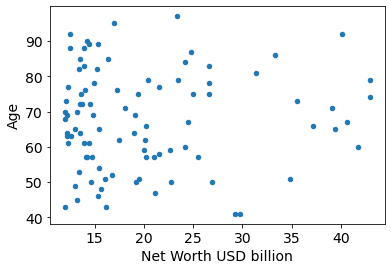

In [52]:
age_total.plot.scatter(x='Net Worth USD billion',y='Age')

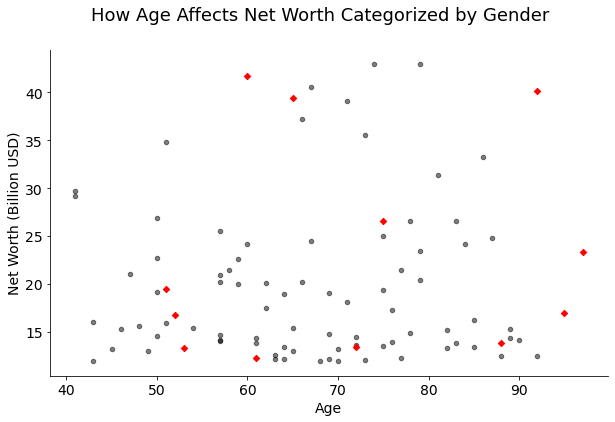

In [53]:
#Scatter Plot With Multiple Categories: How Age effects wealth in men and women
fig, ax = plt.subplots()
age_total[age_total['Gender']=='M'].plot.scatter(x='Age',y='Net Worth USD billion', figsize=(10,6), color='black',alpha=0.5,ax=ax)
age_total[age_total['Gender']=='F'].plot.scatter(x='Age',y='Net Worth USD billion', color='red',marker='D',ax=ax)
ax.set_ylabel('Net Worth (Billion USD)')
fig.suptitle('How Age Affects Net Worth Categorized by Gender', fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.get_figure().savefig("gender_scatter.svg", bbox_inches="tight")

In [54]:
data10['Name'][:10]

0    Carlos Slim Helu
1          Bill Gates
2      Warren Buffett
3       Mukesh Ambani
4      Lakshmi Mittal
5       Larry Ellison
6     Bernard Arnault
7        Eike Batista
8      Amancio Ortega
9       Karl Albrecht
Name: Name, dtype: object

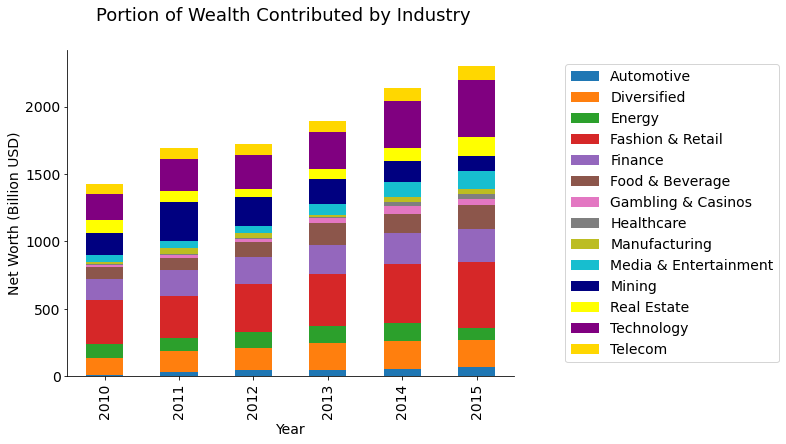

In [55]:
#Stacked Bar: portion of total wealth contributed by each industry
fig, ax = plt.subplots()
r.plot.bar(stacked=True,ax=ax, color=['tab:blue','tab:orange','tab:green','tab:red',
                                      'tab:purple','tab:brown','tab:pink','tab:gray','tab:olive',
                                      'tab:cyan','navy','yellow','purple','gold'],figsize=(8,6))
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax.set_xlabel('Year')
ax.set_ylabel('Net Worth (Billion USD)')
fig.suptitle('Portion of Wealth Contributed by Industry', fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.get_figure().savefig("industry_contributions_bar.svg", bbox_inches="tight")

In [56]:
world_df = world_df[world_df["continent"] != "Antarctica"]
world_df.set_index("name", drop=False, inplace=True)
world_df["color"] = "0.7"

for country, num in nat_nums.items():
    color = "lightsalmon"
    if num >= 2:
        color = "coral"
    if num >= 5:
        color = "tomato"
    if num >= 6:
        color = "red"
    if num >= 10:
        color = "brown"
    world_df.at[country, "color"] = color

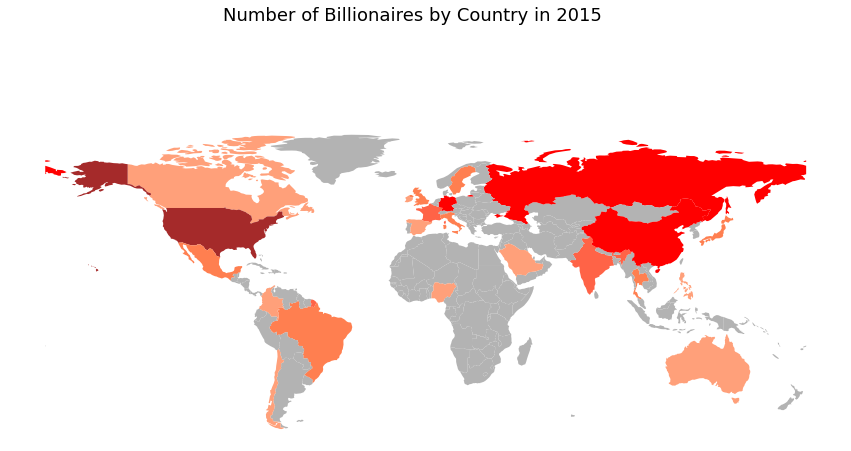

In [57]:
#Map: number of billionaires by country 2015
fig, ax = plt.subplots(figsize=(15, 8))
world_df.plot(color=world_df["color"],legend=True,ax=ax)
fig.suptitle('Number of Billionaires by Country in 2015', fontsize=18)
ax.set_axis_off()
# ax.get_figure().savefig("industry_contributions_bar.svg", bbox_inches="tight")

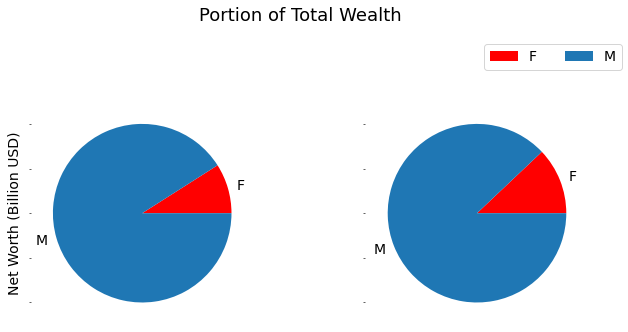

In [58]:
pie15 = data15[['Gender','Net Worth USD billion']].groupby('Gender').sum()
pie10 = data10[['Gender','Net Worth USD billion']].groupby('Gender').sum()
t = plt.subplots(ncols=2,sharey=True,figsize=(10,6))
ax_list = list(t[1])
pie10.plot.pie(y='Net Worth USD billion',colors=['red','tab:blue'],ax=ax_list[0],legend=False)
pie15.plot.pie(y='Net Worth USD billion',colors=['red','tab:blue'],ax=ax_list[1])
ax_list[1].legend(loc='center left', bbox_to_anchor=(0.5, 1.2), ncol=2)
t[0].suptitle("Portion of Total Wealth", fontsize=18)
ax_list[0].set_ylabel("Net Worth (Billion USD)")
plt.subplots_adjust(wspace=0.5)
# t[0].savefig("gender_piechart.svg", bbox_inches="tight")

In [59]:
totals['pct'] = (totals['Total'].div(totals['GDP'])) * 100

In [60]:
totals

,Years,Total,GDP,pct
0,2010,1457.8,66051.234057,2.207075
1,2011,1723.7,73393.195809,2.348583
2,2012,1742.6,75085.219051,2.320830
3,2013,1906.5,77237.062496,2.468375
4,2014,2152.9,79333.432908,2.713736
5,2015,2301.7,75050.176319,3.066882


Text(0.5, 0.98, 'Total Wealth Held by the Top 100 Billionaires as a Percentage of Global GDP')

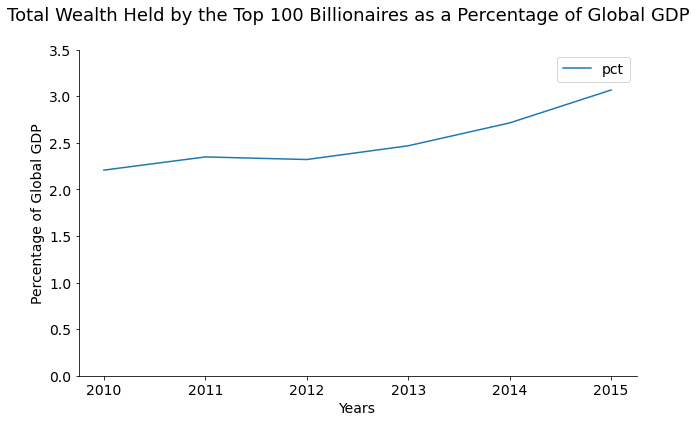

In [61]:
#total wealth as a percentage of global GDP
fig, ax = plt.subplots()
totals.plot.line(x='Years',y='pct', figsize=(10,6), ax=ax)
plt.yticks(np.arange(0, 4, step=0.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Percentage of Global GDP')
fig.suptitle('Total Wealth Held by the Top 100 Billionaires as a Percentage of Global GDP', fontsize=18)
# ax.get_figure().savefig("GDP.svg", bbox_inches="tight")

In [62]:
nat_wealth15 = data15['Net Worth USD billion'].groupby(data15['Nationality']).sum()

In [63]:
df = pd.concat([nat_wealth15, nat_nums], axis=1)
df['Avg'] = df['Net Worth USD billion']/df['Nationality']

In [64]:
tot_avg = df['Avg'].sum()
df['pct'] = (df['Avg']/tot_avg)*100
df

,Net Worth USD billion,Nationality,Avg,pct
Australia,12.3,1,12.300000,2.544093
Brazil,55.3,3,18.433333,3.812693
Canada,25.5,1,25.500000,5.274340
Chile,13.5,1,13.500000,2.792298
China,112.6,6,18.766667,3.881639
Colombia,13.4,1,13.400000,2.771614
France,123.5,5,24.700000,5.108871
Germany,151.0,8,18.875000,3.904046
Hong Kong,101.9,5,20.380000,4.215335
India,88.4,5,17.680000,3.656876


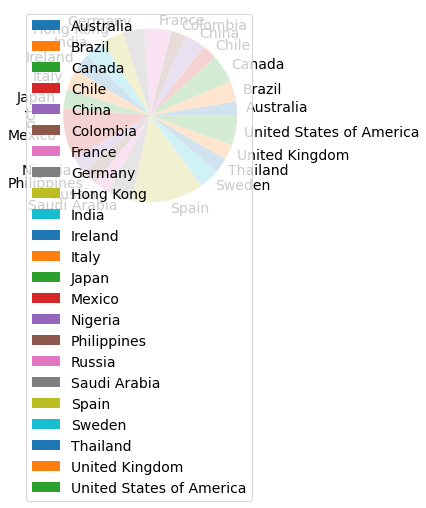

In [65]:
df.plot.pie(y='pct')

In [66]:
nat_nums10 = data10['Nationality'].value_counts()
nat_wealth10 = data10['Net Worth USD billion'].groupby(data10['Nationality']).sum()
df = pd.concat([nat_wealth10, nat_nums10], axis=1)
df['Avg'] = df['Net Worth USD billion']/df['Nationality']
tot_avg = df['Avg'].sum()
df['pct'] = (df['Avg']/tot_avg)*100
df

,Net Worth USD billion,Nationality,Avg,pct
Brazil,48.5,3,16.166667,5.660098
Canada,26.2,2,13.100000,4.586430
Chile,19.1,2,9.550000,3.343543
Cyprus,7.7,1,7.700000,2.695841
Czech Republic,7.6,1,7.600000,2.660830
France,71.3,5,14.260000,4.992557
Germany,77.3,5,15.460000,5.412688
Hong Kong,56.5,3,18.833333,6.593723
India,138.3,9,15.366667,5.380011
Italy,36.5,3,12.166667,4.259662


In [67]:
nat_totals = []
for i in data:
    s = i['Net Worth USD billion'].groupby(i['Nationality']).sum()
    nat_totals.append(s)

In [68]:
cont_totals = pd.DataFrame(columns = ['2010', '2011','2012','2013','2014','2015'])
for i in range(len(nat_totals)):
    col = cont_totals.columns[i]
    d = nat_totals[i]
    cont_totals[col] = d
cont_totals

,2010,2011,2012,2013,2014,2015
Nationality,,,,,,
Brazil,48.5,54.7,68.0,68.5,35.7,55.3
Canada,26.2,23.0,17.5,20.3,22.6,25.5
Chile,19.1,40.1,37.3,17.4,15.5,13.5
Cyprus,7.7,10.7,11.3,11.5,13.6,NaN
Czech Republic,7.6,9.2,NaN,NaN,NaN,NaN
France,71.3,85.3,87.9,87.0,97.5,123.5
Germany,77.3,111.4,104.8,115.4,143.2,151.0
Hong Kong,56.5,74.0,77.8,98.0,101.4,101.9
India,138.3,123.1,69.8,49.2,63.4,88.4


In [69]:
cont_pct = cont_totals.pct_change(axis='columns', periods=5).iloc[:,-1]

In [70]:
high_pct = cont_pct.sort_values(ascending=False)[:10]
high_pct

Nationality
Spain                       1.580000
Japan                       1.271523
United Kingdom              1.092308
United States of America    1.080393
Germany                     0.953428
South Korea                 0.805556
Hong Kong                   0.803540
Cyprus                      0.766234
France                      0.732118
Italy                       0.531507
Name: 2015, dtype: float64

In [71]:
countries = list(high_pct.index)
countries.remove('Cyprus')
countries.remove('South Korea')
countries

['Spain',
 'Japan',
 'United Kingdom',
 'United States of America',
 'Germany',
 'Hong Kong',
 'France',
 'Italy']

In [72]:
cont_totals = cont_totals.reset_index()

In [73]:
highest_cont = cont_totals[cont_totals['Nationality'].isin(countries)]
highest_cont = highest_cont.set_index('Nationality')

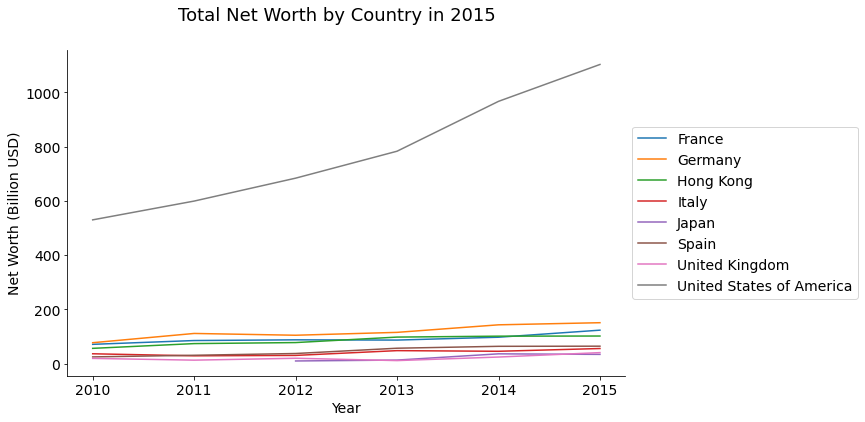

In [74]:
h = highest_cont.T
fig, ax = plt.subplots()
h.plot.line(figsize=(10,6),ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Year')
ax.set_ylabel('Net Worth (Billion USD)')
fig.suptitle('Total Net Worth by Country in 2015', fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.get_figure().savefig("country_growth.svg", bbox_inches="tight")

In [75]:
top10 = []
for i in data:
    s = i[i['No.']<=10][['Name','No.']].set_index('Name')
    top10.append(s)

In [76]:
toptens = top10[0].merge(top10[1],how = 'outer',left_index=True, right_index=True)
for i in top10[2:]:
    toptens = toptens.merge(i,how = 'outer',left_index=True, right_index=True)

In [77]:
age_v_wealth = data15[data15['Age'].isnull() == False]

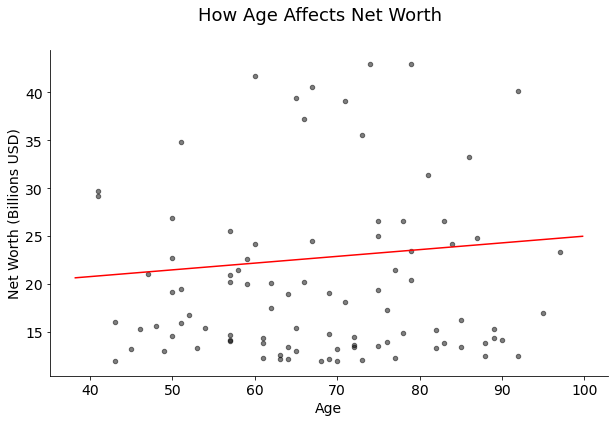

In [78]:
A = age_v_wealth['Age'].values.reshape(-1,1)
b = age_v_wealth['Net Worth USD billion'].values.reshape(-1,1)
q = LinearRegression().fit(A, b)
age_total = age_total[age_total['Age'] >= 39]
fig, ax = plt.subplots()
age_total.plot.scatter(x='Age',y='Net Worth USD billion', figsize=(10,6),alpha = 0.5, color = 'black',ax=ax)
y0 = (ax.get_xlim()[0] * float(q.coef_)) + float(q.intercept_)
y1 = (ax.get_xlim()[1] * float(q.coef_)) + float(q.intercept_)
ax.plot(ax.get_xlim(), [y0, y1], color='r')
ax.set_ylabel('Net Worth (Billions USD)')
fig.suptitle('How Age Affects Net Worth', fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.get_figure().savefig("age_networth.svg", bbox_inches="tight")

In [79]:
age_v_wealth['Net Worth USD billion'].mean()

22.727272727272727

In [80]:
q.coef_

array([[0.07025051]])

In [81]:
q.intercept_

array([17.98358937])

In [82]:
data15[data15['Gender']=='M']['Net Worth USD billion'].mean()

22.49

In [83]:
data15[data15['Gender']=='F']['Net Worth USD billion'].mean()

23.133333333333336

In [84]:
pie15

,Net Worth USD billion
Gender,
F,277.6
M,2024.1


In [85]:
pie10

,Net Worth USD billion
Gender,
F,130.7
M,1319.0


In [86]:
frame_count = 5
def draw_frame(frame_num):
    ax.cla()
    g_pie = data[frame_num][['Gender','Net Worth USD billion']].groupby('Gender').sum()
    g_pie.plot.pie(y='Net Worth USD billion',colors=['red','tab:blue'],ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylabel("Net Worth (Billion USD)")

fig, ax = plt.subplots()
fig.suptitle("Portion of Total Wealth", fontsize=18)
anim = FuncAnimation(fig, draw_frame, frames=frame_count, interval=1000)
html = anim.to_html5_video()
plt.close(fig)
HTML(html)